<a href="https://colab.research.google.com/github/Rizwanali324/Athlete_Ferritin_Projection/blob/main/ANOVA_Testing_of_hypothesis_sport_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define the file path
file_path = '/content/drive/MyDrive/Datasets/Athlete Data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()

,Sex,Sport,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,%Bfat,LBM,Ht,Wt
0,female,BBall,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,female,BBall,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,female,BBall,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,female,BBall,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,female,BBall,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [ ]:
df.sample(5)

,Sex,Sport,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,%Bfat,LBM,Ht,Wt
85,female,T400m,4.32,6.8,40.6,13.7,46,17.54,54.6,12.16,46.12,173.0,52.5
189,male,WPolo,5.03,7.5,43.6,14.4,102,23.25,76.0,14.69,75.00,194.1,87.6
104,male,Swim,5.11,6.7,46.1,15.6,93,22.32,40.5,6.86,78.00,193.4,83.5
33,female,Row,4.41,5.9,41.1,13.5,41,23.97,123.6,22.39,61.70,182.1,79.5
65,female,Swim,4.51,5.1,40.9,14.0,115,19.00,52.5,11.85,48.57,170.3,55.1


In [ ]:
df.skew()

<ipython-input-5-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


RCC      0.419123
WCC      0.841311
Hc       0.277288
Hg       0.177254
Ferr     1.290184
BMI      0.953611
SSF      1.183475
%Bfat    0.765242
LBM      0.361197
Ht      -0.200797
Wt       0.242432
dtype: float64

#Descriptive analysis

In [ ]:
df.keys()

Index(['Sex', 'Sport', 'RCC', 'WCC', 'Hc', 'Hg', 'Ferr', 'BMI', 'SSF', '%Bfat',
       'LBM', 'Ht', 'Wt'],
      dtype='object')

In [ ]:

# Assuming your dataset is stored in a DataFrame called 'df'
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in the '{column}' column:", unique_values)


Unique values in the 'Sex' column: ['female' 'male']
Unique values in the 'Sport' column: ['BBall' 'Row' 'Netball' 'Swim' 'Field' 'T400m' 'TSprnt' 'Tennis' 'Gym'
 'WPolo']


In [ ]:
df.describe()

,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,%Bfat,LBM,Ht,Wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.008168
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925574
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


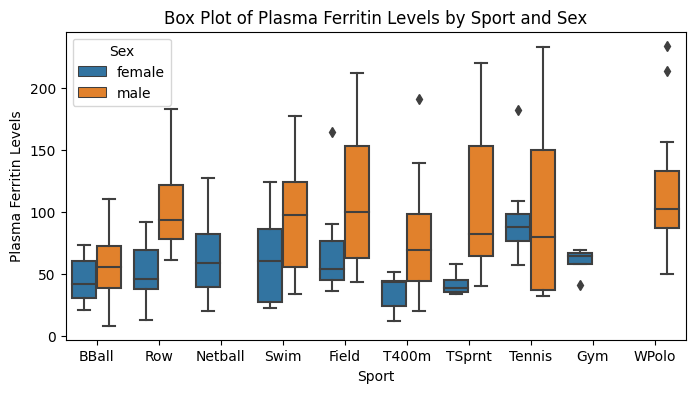

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Sport', y='Ferr', hue='Sex', data=df)
plt.title('Box Plot of Plasma Ferritin Levels by Sport and Sex')
plt.xlabel('Sport')
plt.ylabel('Plasma Ferritin Levels')
plt.show()

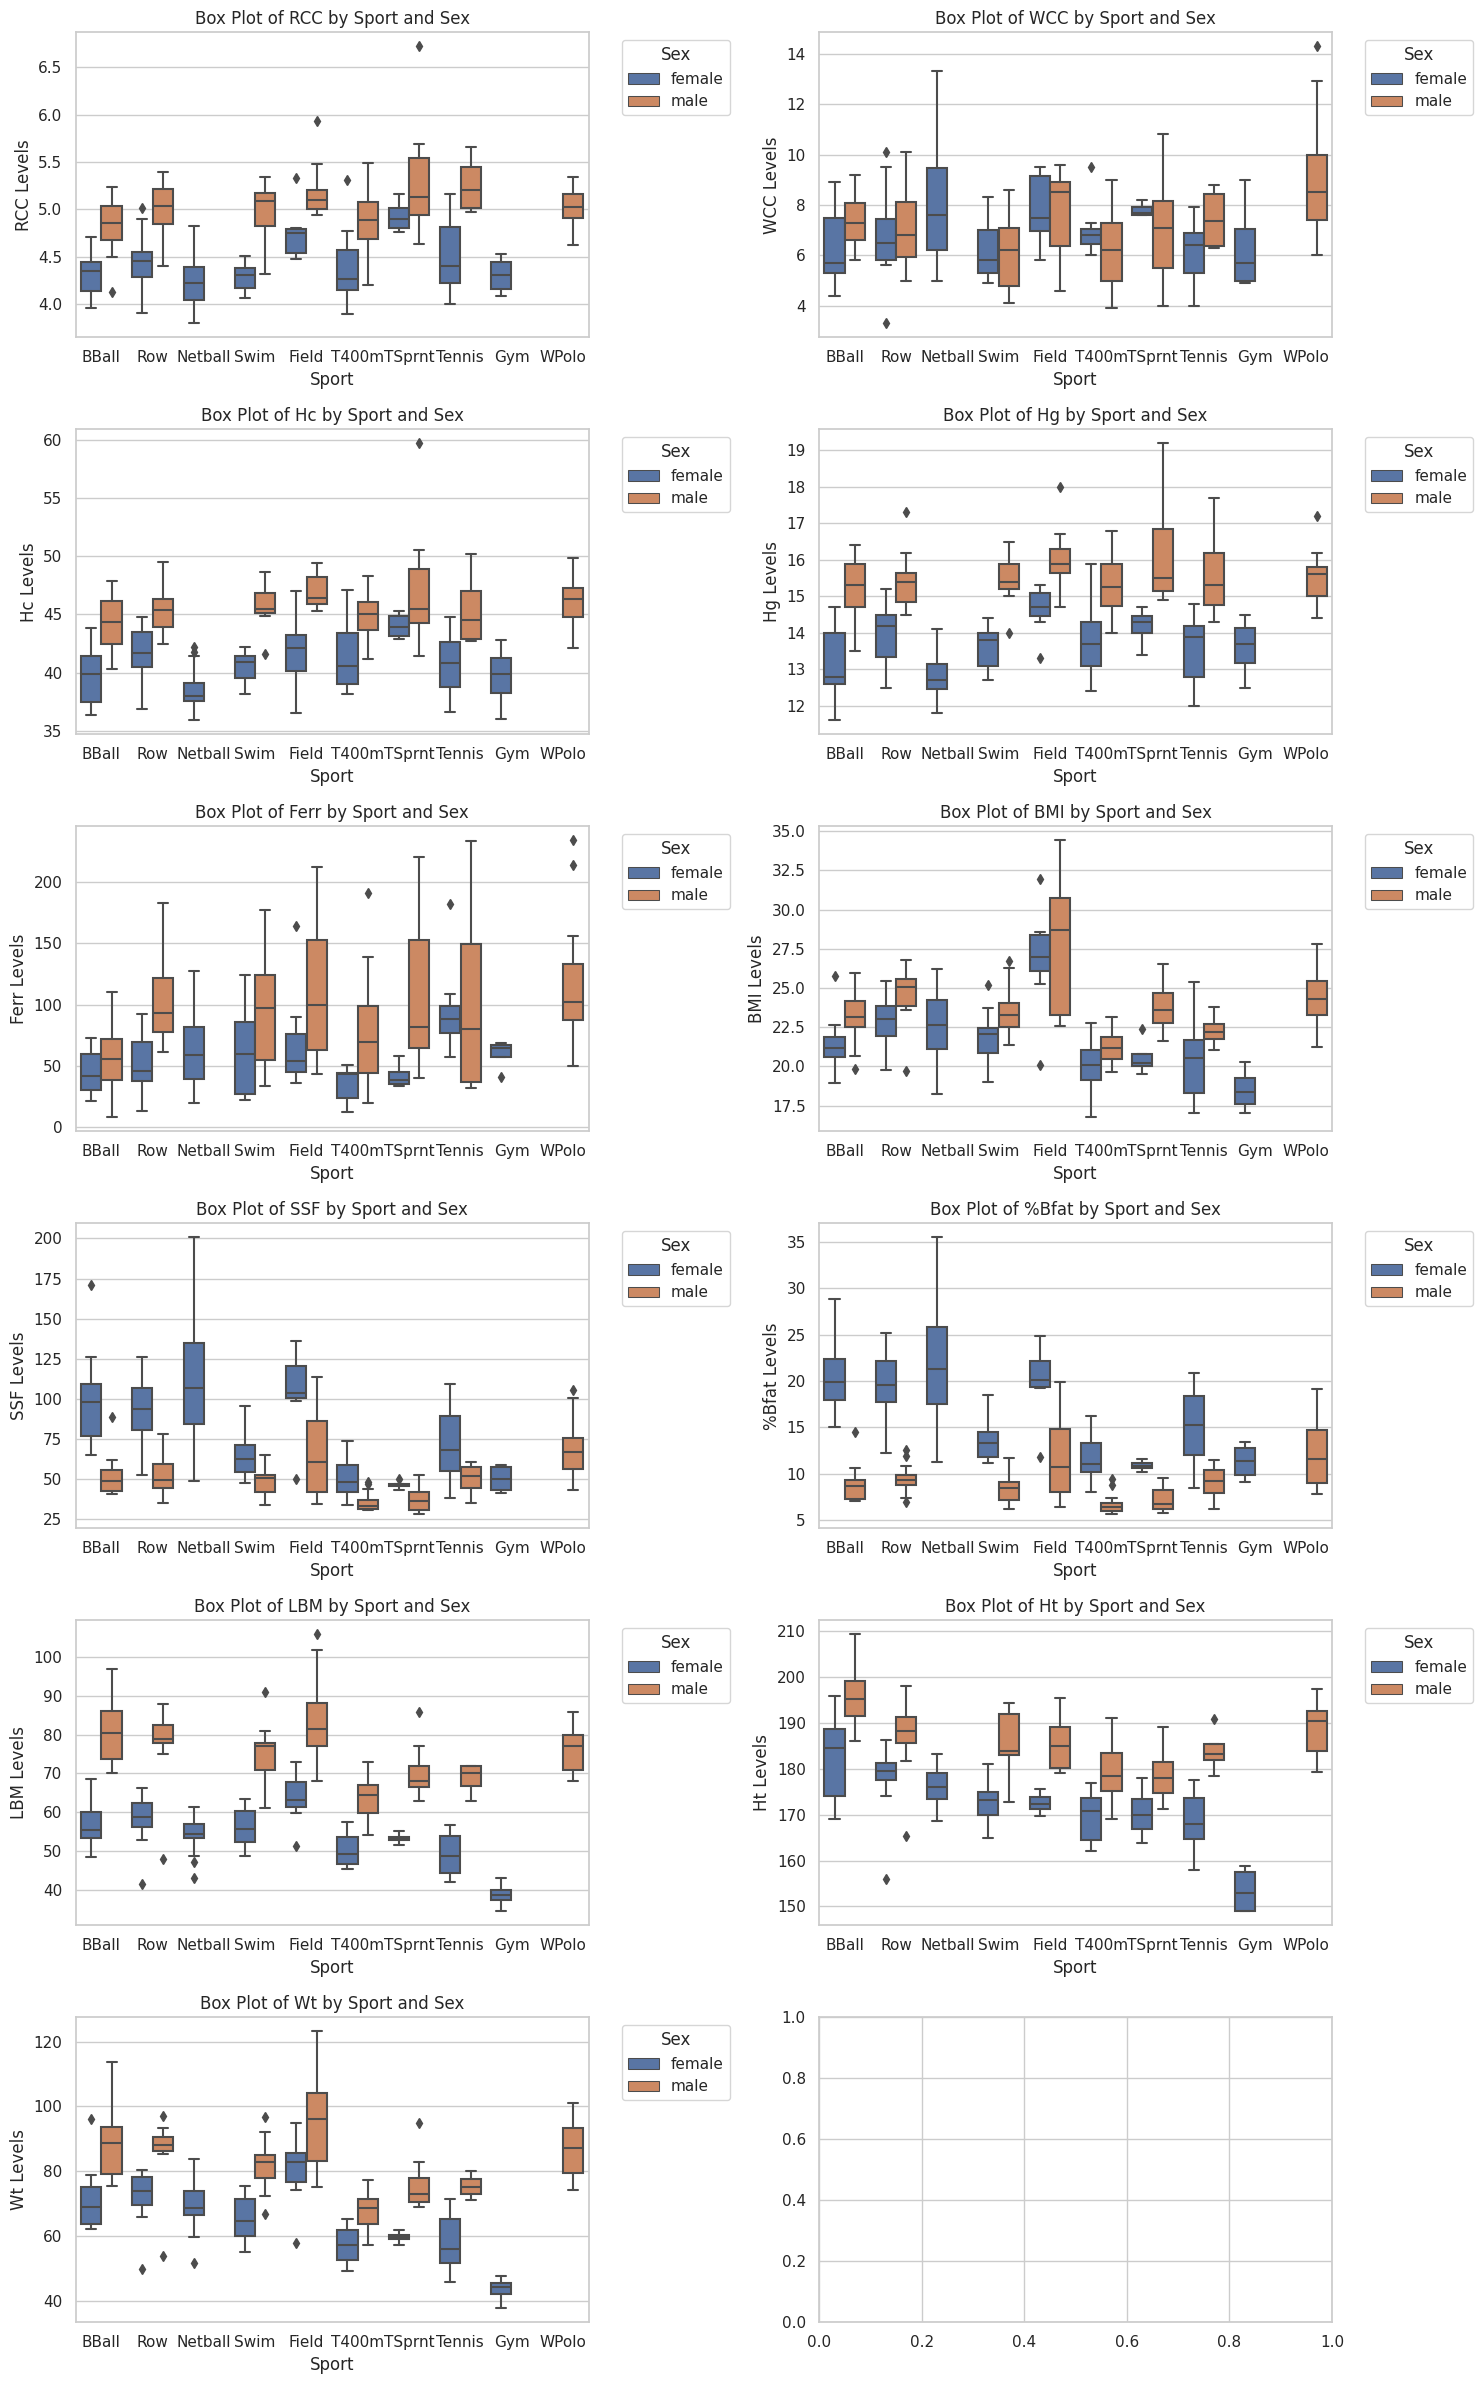

In [ ]:

from math import ceil
# Set the style for seaborn plots
sns.set(style="whitegrid")

# List of physical markers
physical_markers = ['RCC', 'WCC', 'Hc', 'Hg', 'Ferr', 'BMI', 'SSF', '%Bfat', 'LBM', 'Ht', 'Wt']

# Define the number of columns for subplots
num_cols = 2

# Calculate the number of rows needed
num_rows = ceil(len(physical_markers) / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array to iterate through it
axes = axes.flatten()

# Create box plots for each physical marker
for i, marker in enumerate(physical_markers):
    sns.boxplot(x='Sport', y=marker, hue='Sex', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {marker} by Sport and Sex')
    axes[i].set_xlabel('Sport')
    axes[i].set_ylabel(f'{marker} Levels')
    axes[i].legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


interpratation:

Median Comparison>>>



the median (line inside the box) is consistently higher for male athletes across all sports, it indicates that, on average, male athletes tend to have higher Plasma Ferritin levels than female athletes.


Box Spread>>

The wider box spread for male athletes implies greater variability in Plasma Ferritin levels among males within each sport.
Potential Implications>>

Higher median levels might suggest a gender-related difference in Plasma Ferritin concentrations.
Greater variability among male athletes could indicate a more diverse range of Ferritin levels within the male group.

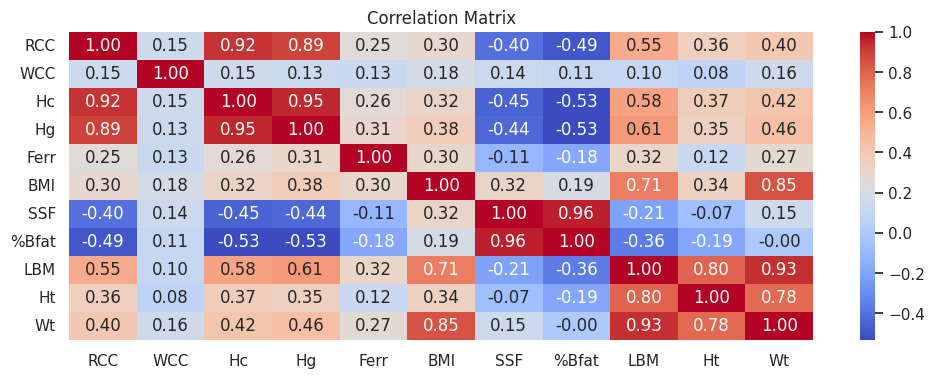

In [ ]:
plt.figure(figsize=(12, 4))
correlation_matrix = df.select_dtypes(include="number").corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
correlation_matrix

,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,%Bfat,LBM,Ht,Wt
RCC,1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,-0.493512,0.550975,0.358854,0.403743
WCC,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.108114,0.102734,0.076958,0.155844
Hc,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,-0.532449,0.583375,0.371192,0.423699
Hg,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,-0.531522,0.610986,0.352322,0.455255
Ferr,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,-0.183386,0.317581,0.123255,0.273686
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.187558,0.713858,0.337097,0.845955
SSF,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,0.963017,-0.207749,-0.071253,0.154227
%Bfat,-0.493512,0.108114,-0.532449,-0.531522,-0.183386,0.187558,0.963017,1.000000,-0.361850,-0.188022,-0.000162
LBM,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,-0.361850,1.000000,0.802119,0.930904
Ht,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,-0.188022,0.802119,1.000000,0.780906


Strength of Correlations:
Strong Positive Correlation (0.7 to 1.0):
RCC and Hc (0.92), Hc and Hg (0.95), Hg and LBM (0.61), BMI and Wt (0.85), LBM and Wt (0.93).

_____________
Moderate Positive Correlation (0.3 to 0.7):
RCC and LBM (0.55), Hc and LBM (0.58), Hg and BMI (0.38), Ferr and BMI (0.30), BMI and LBM (0.71), SSF and %Bfat (0.96), Ht and LBM (0.80), Wt and LBM (0.78).

__________
Weak Positive Correlation (0 to 0.3):
WCC and Hc (0.15), Ferr and Wt (0.27), Ht and Wt (0.36).
__________

Direction of Correlations:
Positive Correlations:
Variables with positive correlations increase together. For example, as RCC increases, Hc tends to increase.
Negative Correlations:
Variables with negative correlations move in opposite directions. For example, as SSF increases, %Bfat tends to decrease.
Specific Interpretations:
Hematological Markers (RCC, Hc, Hg):
_________________
Strong positive correlations between RCC and Hc, Hc and Hg, suggesting a logical relationship within the hematological markers.
Body Composition and Weight:
__________
Positive correlations between BMI and Wt, LBM and Wt, indicating that individuals with higher body mass index (BMI) tend to have higher weight, and individuals with higher lean body mass (LBM) also tend to have higher weight.
Body Fat Measures:
__________________
High positive correlation between SSF and %Bfat, indicating that as skinfold thickness (SSF) increases, the percentage of body fat (%Bfat) also tends to increase.
Height and Body Composition:
___________
Positive correlation between Ht and LBM, suggesting that taller individuals may have higher lean body mass.
Potential Considerations:
Multicollinearity:
____________
Some variables, such as BMI and Wt, have high correlations. Consider potential multicollinearity issues when using these variables in regression models.

__________
Interpretation Caution:

Correlation does not imply causation. While variables may be correlated, it does not necessarily mean that changes in one variable cause changes in another.


#preprocessing

In [ ]:
df.isnull().sum().sum()


0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     202 non-null    object 
 1   Sport   202 non-null    object 
 2   RCC     202 non-null    float64
 3   WCC     202 non-null    float64
 4   Hc      202 non-null    float64
 5   Hg      202 non-null    float64
 6   Ferr    202 non-null    int64  
 7   BMI     202 non-null    float64
 8   SSF     202 non-null    float64
 9   %Bfat   202 non-null    float64
 10  LBM     202 non-null    float64
 11  Ht      202 non-null    float64
 12  Wt      202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


#check the assumption of ANOVA

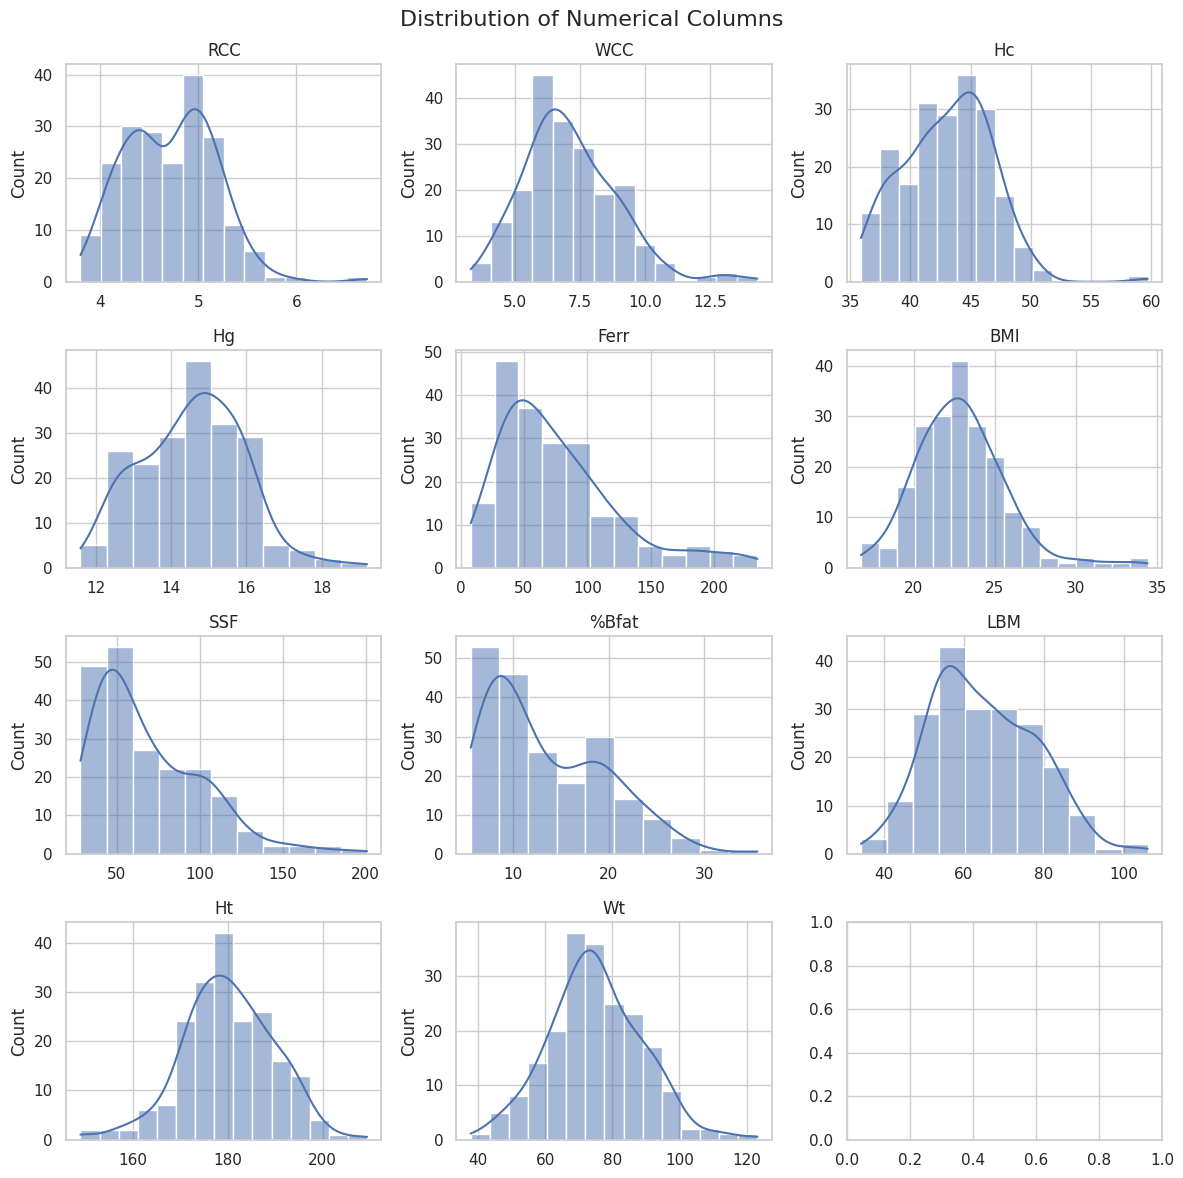

In [ ]:

#Normiltity
numerical_columns = df.select_dtypes(include="number")

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for each numerical column
fig, axes = plt.subplots(4, 3, figsize=(12, 12), tight_layout=True)
fig.suptitle('Distribution of Numerical Columns', fontsize=16)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numerical columns and plot histograms
for ax, column in zip(axes, numerical_columns):
    sns.histplot(df[column], ax=ax, kde=True)
    ax.set_title(column)
    ax.set_xlabel('')

# Show the plot
plt.show()


#test of normality  and homogeneity

#Apply transformation

In [ ]:
"""from scipy.stats import boxcox
# Apply Box-Cox transformation to each numerical column
transformed_columns = {}
for column in numerical_columns:
    transformed_data, lambda_value = boxcox(df[column])
    transformed_columns[column] = {'data': transformed_data, 'lambda': lambda_value}

# Visualize the original and transformed distributions
for column, data_info in transformed_columns.items():
    plt.figure(figsize=(12, 4))

    # Original Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Original Distribution ({column})')

    # Transformed Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data_info['data'], kde=True)
    plt.title(f'Box-Cox Transformed Distribution ({column}), Lambda={data_info["lambda"]:.4f}')

    plt.tight_layout()
    plt.show()

"""

'from scipy.stats import boxcox\n# Apply Box-Cox transformation to each numerical column\ntransformed_columns = {}\nfor column in numerical_columns:\n    transformed_data, lambda_value = boxcox(df[column])\n    transformed_columns[column] = {\'data\': transformed_data, \'lambda\': lambda_value}\n\n# Visualize the original and transformed distributions\nfor column, data_info in transformed_columns.items():\n    plt.figure(figsize=(12, 4))\n\n    # Original Distribution\n    plt.subplot(1, 2, 1)\n    sns.histplot(df[column], kde=True)\n    plt.title(f\'Original Distribution ({column})\')\n\n    # Transformed Distribution\n    plt.subplot(1, 2, 2)\n    sns.histplot(data_info[\'data\'], kde=True)\n    plt.title(f\'Box-Cox Transformed Distribution ({column}), Lambda={data_info["lambda"]:.4f}\')\n\n    plt.tight_layout()\n    plt.show()\n\n'

In [ ]:
"""
# Apply Box-Cox transformation to each numerical column in-place
for column in numerical_columns:
    df[column], lambda_value = boxcox(df[column])
df1.sample(100)==df.copy()"""

'\n# Apply Box-Cox transformation to each numerical column in-place\nfor column in numerical_columns:\n    df[column], lambda_value = boxcox(df[column])\ndf1.sample(100)==df.copy()'

<ipython-input-19-2c55b2e57a84>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  columns_to_transform = df.skew()


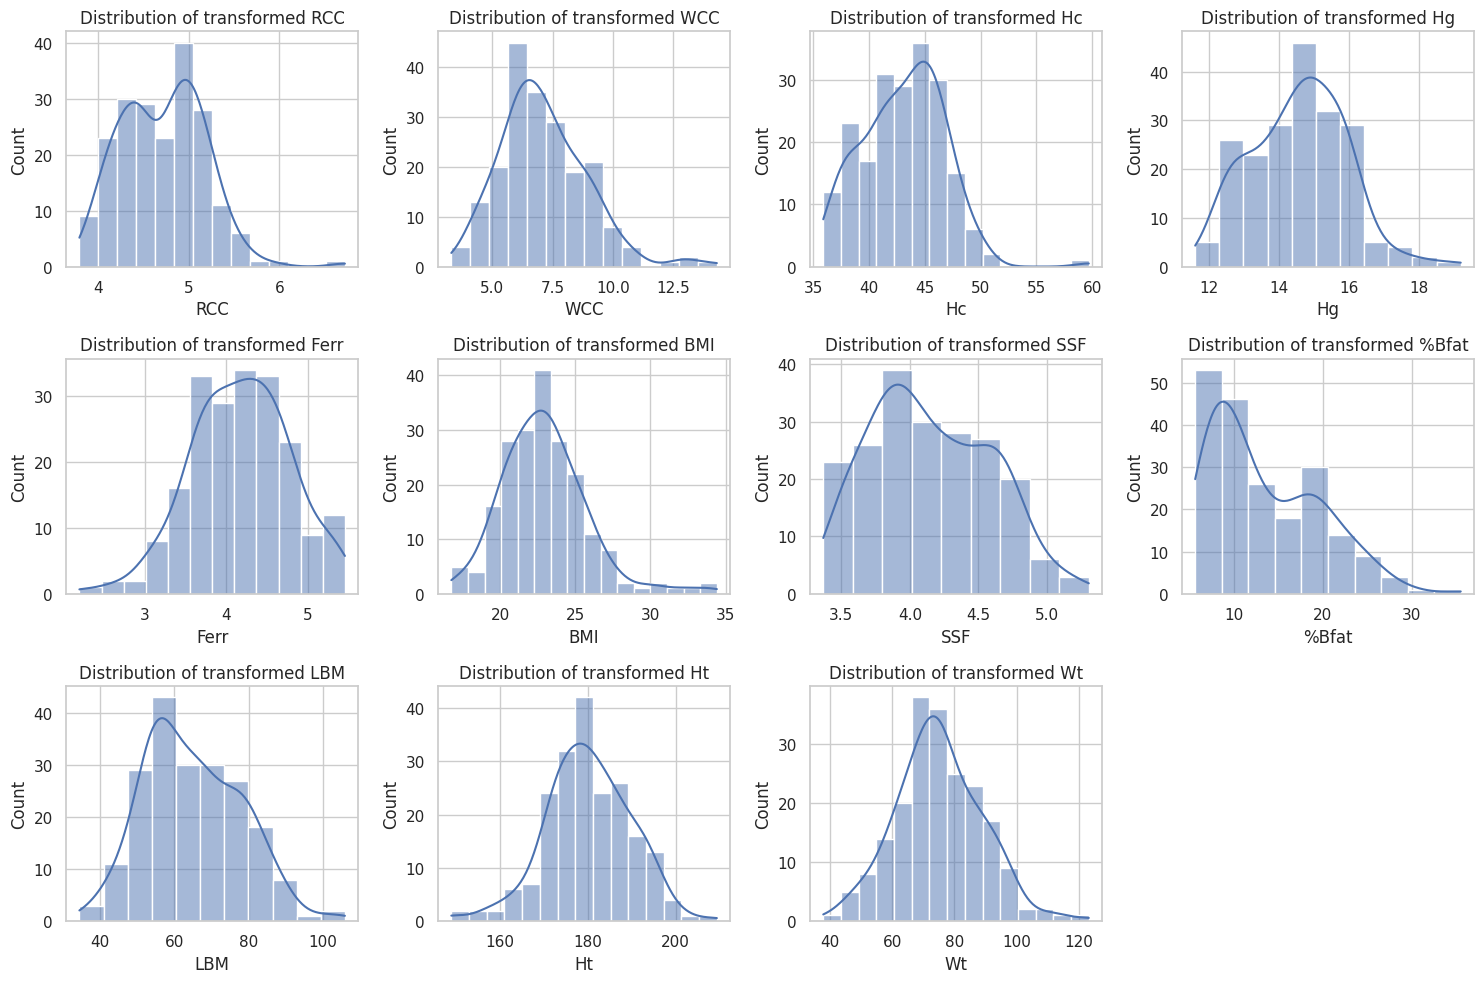

In [ ]:


# List of columns with their corresponding skewness values
columns_to_transform = df.skew()

# Apply appropriate transformations based on skewness
for column, skewness in columns_to_transform.items():
    if skewness > 1:
        # Apply log transformation for highly skewed columns
        df[column] = np.log1p(df[column])
    elif skewness < -1:
        # Apply square root transformation for highly negatively skewed columns
        df[column] = np.sqrt(df[column])

# Plot histograms for each column after transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_transform.keys(), 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns layout
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of transformed {col}')

plt.tight_layout()
plt.show()


In [ ]:
df.skew()

<ipython-input-20-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


RCC      0.419123
WCC      0.841311
Hc       0.277288
Hg       0.177254
Ferr    -0.195779
BMI      0.953611
SSF      0.297288
%Bfat    0.765242
LBM      0.361197
Ht      -0.200797
Wt       0.242432
dtype: float64

#labeling data

In [ ]:

# Check the unique values in 'Sex' and 'Sport' columns
unique_sex_values = df['Sex'].unique()
unique_sport_values = df['Sport'].unique()

# Create a mapping dictionary for encoding
sex_encoding = {sex: i for i, sex in enumerate(unique_sex_values)}
sport_encoding = {sport: i for i, sport in enumerate(unique_sport_values)}

# Apply encoding to 'Sex' and 'Sport' columns
df['Sex'] = df['Sex'].map(sex_encoding)
df['Sport'] = df['Sport'].map(sport_encoding)
df['Sex'] = pd.Categorical(df['Sex'])
df['Sport'] = pd.Categorical(df['Sport'])

df

,Sex,Sport,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,%Bfat,LBM,Ht,Wt
0,0,0,3.96,7.5,37.5,12.3,4.110874,20.56,4.701389,19.75,63.32,195.9,78.9
1,0,0,4.41,8.3,38.2,12.7,4.234107,20.67,4.642466,21.30,58.55,189.7,74.4
2,0,0,4.14,5.0,36.4,11.6,3.091042,21.86,4.659658,19.88,55.36,177.8,69.1
3,0,0,4.11,5.3,37.3,12.6,4.248495,21.88,4.847332,23.66,57.18,185.0,74.9
4,0,0,4.45,6.8,41.5,14.0,3.401197,18.96,4.398146,17.64,53.20,184.6,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,9,4.90,7.6,45.6,16.0,4.510860,27.56,4.222445,11.79,82.00,183.9,93.2
198,1,7,5.66,8.3,50.2,17.7,3.663562,23.76,4.051785,10.05,72.00,183.5,80.0
199,1,7,5.03,6.4,42.7,14.3,4.812184,22.01,3.883624,8.51,68.00,183.1,73.8
200,1,7,4.97,8.8,43.0,14.9,5.455321,22.34,4.117410,11.50,63.00,178.4,71.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Sex     202 non-null    category
 1   Sport   202 non-null    category
 2   RCC     202 non-null    float64 
 3   WCC     202 non-null    float64 
 4   Hc      202 non-null    float64 
 5   Hg      202 non-null    float64 
 6   Ferr    202 non-null    float64 
 7   BMI     202 non-null    float64 
 8   SSF     202 non-null    float64 
 9   %Bfat   202 non-null    float64 
 10  LBM     202 non-null    float64 
 11  Ht      202 non-null    float64 
 12  Wt      202 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 18.4 KB


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Fit a two-way ANOVA model
formula = 'Ferr ~ C(Sex) + C(Sport) + C(Sex):C(Sport)'
model = ols(formula, df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                    sum_sq     df         F    PR(>F)
C(Sex)                 NaN    1.0       NaN       NaN
C(Sport)          8.688787    9.0  3.614918  0.002053
C(Sex):C(Sport)   7.476072    9.0  3.110375  0.003986
Residual         49.407167  185.0       NaN       NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1925: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 6
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 7
  warnings.warn('covariance of constraints does not have full '



Interpretation:
C(Sex):

The factor 'Sex' has a NaN value for sum of squares and F-statistic. This suggests that the factor 'Sex' is not contributing significantly to the variation in the response variable.
__________
C(Sport):

The factor 'Sport' has a significant effect on the response variable.
The sum of squares (8.688787) indicates the amount of variance in the response variable that is attributed to the factor 'Sport'.
The F-statistic (3.614918) is used to test the null hypothesis that the means of the response variable are equal across different levels of 'Sport'.
The p-value (0.002053) is less than the significance level (commonly 0.05), indicating that the effect of 'Sport' is statistically significant.
___________________
C(Sex):C(Sport):

The interaction between 'Sex' and 'Sport' also has a significant effect on the response variable.
The sum of squares (7.476072) indicates the amount of variance in the response variable attributed to the interaction between 'Sex' and 'Sport'.
The F-statistic (3.110375) is used to test the null hypothesis that the interaction effect is zero.
The p-value (0.003986) is less than 0.05, suggesting that the interaction effect is statistically significant.


__________
Residual:

The residual sum of squares (49.407167) represents unexplained variability in the response variable that is not accounted for by the factors 'Sex' and 'Sport'.
The degrees of freedom for the residuals (185) indicate the number of observations minus the number of parameters estimated in the model.
____________
Overall Interpretation:
The results suggest that both 'Sport' and the interaction between 'Sex' and 'Sport' significantly contribute to the variability in the response variable.